# Where to work next?

### Project Overview and Business Understanding
#### CRISP-DM Stage 1: Business Understanding


Working for IBM, there are often opportunities to work in a variety of worldwide locations outside of your own home country. About 10 years ago I took an assignment to work and live for several years in the UK. That was a fascinating opportunity to work in and absorb a European culture. Now many of the opportunities are in what IBM refers to as "emerging markets", such as China, Singapore, India, and others.

While Europe was what I'd consider to be an "easy" place to work (not too dissimalar cultures from the US, English generally spoken, salary ranges comparable to the US), I'm wondering if an opportunity to work in one of the emerging markets would be viable.

Use the Stack Overflow data from 2017 from Kaggle as the basis for the examination per the rubric. The survey itself is pretty interesting and I will use this project as a foundation to examine the results with future results. I did find that Kaggle also has provides a good survey data tool that was very helpful in getting an intial view of the data. 

Here are the questions that I'm looking to answer in this project:

Main query topic: Should I stay in the US or should I go? I'll frame this as basically "Stay in the West" or "Go to the East". My business questions to answer this are:

- What is the salary difference between the West and the East?
- Any significant job satisfaction differences?
- What is the propensity to work remotely? 

#### References

Note: I was torn between doing a Covid-19 study with this data looking at potential COBOL programmers (since there is a shortage of COBOL programmers) and the West/East comparison. In the end as relevant as the COBOL study would have been, I decided on West vs. East since I still am considerating a position in one of the emerging markets. 

This was a helpful overview POV of writing a Blog Posting: https://medium.com/@AbdulazizKTA/write-a-data-science-blog-post-f8c5e1ece761 

While I didn't end up using much from here, this is a great recap of Andrew Ng's ML class from Stanford: https://drive.google.com/file/d/1TgcLh0XzkFioN9vd7xwLzsKp2pHMKd8_/view

Covid-19 Projects on Kaggle: https://www.kaggle.com/covid19

This is a classic, and helpful in putting together a Data Science Blog Post: https://www.kaggle.com/c/titanic

Good info here on Data Science Blog Posts, and a good section on Git integration: https://www.dataquest.io/blog/how-to-setup-a-data-science-blog/

Hindsight is 20-20! It's instructive and informative to see the overall analysis that Stack Overflow does themselves on their survey data: https://insights.stackoverflow.com/survey/2017

I'm using the CRISP-DM framework from our lesson 1 as well as an SPSS link provided around CRISP-DM

#### CRISP-DM

Coming from an SPSS background, CRISP-DM has always been a cornerstone of SPSS development. Particulary when using SPSS Modeler. I'll be using the CRISP-DM framework to build out this notebook. 

The SPSS Modeler view of CRISP-DM is here: https://www.ibm.com/support/knowledgecenter/SS3RA7_18.2.1/modeler_crispdm_ddita/clementine/crisp_help/crisp_overview.html

<img src="https://www.ibm.com/support/knowledgecenter/SS3RA7_18.2.1/modeler_crispdm_ddita/clementine/images/crisp_process.jpg" alt="SPSS CRISP-DM" title="SPSS Crisp" />

#### Jupyter Notebook Framework

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Model Data

5. Results

6. Deploy


### Preliminary Review

1. Race as indicator of potential bias/low reporting; better to use Country

2. Influence CLoud
3. Influence Internet
4. University
5. FormalEducation
6. ProgramHobby
    1. Shows love of programming?
7. HomeRemote
8. CompanySize
    1. What’s good
9. YearsProgram
10. YearsCodedJob
11. YearsCodedJobPast
12. DeveloperType
13. NonDeveloperType
14. CareerSatisfaction
15. JobSatisfaction
    1. Difference?
16. JobSecurity
17. KinshipDevelopers
18. CompetePeers
19. ChangeWorld
20. HoursPerWeek
21. LastNewJob
22. JobProfile
    1. How to get work?
23. EducationTypes
24. WorkStart
25. HaveWorkedLanguage
26. WantWorkLanguage
27. HaveWorkedDataBase
28. WantWorkDatabase
29. Methodology
30. CollaborateRemote
31. Gender
32. Salary
33. ExpectedSalary


#### What do we have to work with?

7 Numeric
146 Categorical
1 Bool

### Rubric
#### Code Functionality and Readability
- Code is readable (uses good coding practices - PEP8)
- Code is functional.
- Write code that is well documented and uses functions and classes as necessary.

#### Data
- Project follows the CRISP-DM Process while analyzing their data.
- Proper handling of categorical and missing values in the dataset.

#### Analysis, Modeling, Visualization
- There are 3-5 business questions answered.

#### Github Repository
- Student must publish their code in a public Github repository. 
 
#### Blog Post
- Communicate their findings with stakeholders. 
- There should be an intriguing title and image related to the project.
- The body of the post has paragraphs that are broken up by appropriate white space and images.
- Each question has a clearly communicated solution.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
from platform import python_version

print("MY PYTHON VERSION", ">>>  ", python_version(), "  <<<")

MY PYTHON VERSION >>>   3.7.5   <<<


NOTE: I'll be adding comments throughout to be more illustrative of the CRISP process. So some of the python code will be commented out since I decided that the insight gained led me to a new/better understanding. As we've seen throught the course, EDA and Data Discovery are also iterative. I'll point out areas where some commented code lead me to  

### Data Understanding

#### CRISP-DM Stage 2: Data Understanding
I'll document my approach to data understanding. A few notes:

1) I'll take the more "low level" approach with python/numpy (head,tail,describe,shape,etc). Those can be very helpful tools for initial understanding
2) I like a python tool called "Pandas Profiling" as it provides a helpful summary as well is reflective of how I use python in my daily work. What I find valuable about this tool is that it provides a good level of initial data exploration, the depth of detail I want to see for each feature of data, as well as a good start at correlations and other related relationships. However, I also need to make sure of the overall size (length and width) of the data. In this case, I'll find that the data has 154 columns; not an untenable amount, so I'll use Pandas Profiling. If the data is 1,000's of columns wide, I need to rethink my data exploration. 

For the very wide datasets, I'll use a combination of low-level python/numpy functions and potentially break the dataset in smaller column datasets. As they say in many field, "it just depends". :-)


#### Note on salary
While there is a question in the survey that references currency used, in research how Stack Overflow handles the Salary field I found it's handy that they convert all salary values in terms of USD. https://insights.stackoverflow.com/survey/2019#methodology  

As expected, there are also a few currency converters for Python
https://www.geeksforgeeks.org/currency-converter-in-python/
https://pypi.org/project/CurrencyConverter/


In [3]:
#Read the data and get a first look
df = pd.read_csv('survey_results_public.csv')
df.head()

Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Employed full-time   
4                      Employed full-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   
2                                  Bachelor's degree   
3                                    Doctoral degree   
4                                    Master's degree   

                                  MajorUndergrad  \
0                                            NaN   
1       Computer science or software engineering   
2       Computer science or software engineering   
3  A non-computer-focused engineering discipline   
4       Computer science or software engineering   

                                          HomeRemote  \
0                                                NaN   
1              More than half, but not all, the time   
2  Less than half the time, but at least one day ...   
3  Less than half the time, but at least one day ...   
4                                              Never   

                CompanySize  ... StackOverflowMakeMoney Gender  \
0                       NaN  ...      Strongly disagree   Male   
1        20 to 99 employees  ...      Strongly disagree   Male   
2  10,000 or more employees  ...               Disagree   Male   
3  10,000 or more employees  ...               Disagree   Male   
4        10 to 19 employees  ...                    NaN    NaN   

  HighestEducationParents                          Race         SurveyLong  \
0             High school  White or of European descent  Strongly disagree   
1       A master's degree  White or of European descent     Somewhat agree   
2   A professional degree  White or of European descent     Somewhat agree   
3       A doctoral degree  White or of European descent              Agree   
4                     NaN                           NaN                NaN   

  QuestionsInteresting QuestionsConfusing InterestedAnswers    Salary  \
0       Strongly agree           Disagree    Strongly agree       NaN   
1       Somewhat agree           Disagree    Strongly agree       NaN   
2                Agree           Disagree             Agree  113750.0   
3                Agree     Somewhat agree    Strongly agree       NaN   
4                  NaN                NaN               NaN       NaN   

   ExpectedSalary  
0             NaN  
1         37500.0  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 154 columns]

In [4]:
#Read the schema and get a first look

# Note: It became pretty obvious during first iteration of development that I'd want to see the full question. I'd need the dataframe descriptor for the question for further exploration, but having
# the actual question asked is helpful

df_schema = pd.read_csv('survey_results_schema.csv')
df_schema.head()

Column                                           Question
0    Respondent                               Respondent ID number
1  Professional         Which of the following best describes you?
2  ProgramHobby  Do you program as a hobby or contribute to ope...
3       Country            In which country do you currently live?
4    University  Are you currently enrolled in a formal, degree...

In [5]:
# Super important analysis for me, since it gives me an idea of the width. Good general information to know, as well as helps me set up for Pandas Profiling

df.shape

(51392, 154)

### A Problem

So, while I was interested in the salary numbers, I see that I have a very high percentage of NAN's in my salary field (74%). This represents an interesting conundrum, since I'm interested in the salary averages for the east vs. the west. 

For the sake of this analysis, I'm not going to remove the NAN's. Since I'll have a good sample of countries that make up what I call "West" and "East", I'll use the mean salary values as a comparison point.

What is helpful in a similar way is that I also have a field "Overpaid" that can serve as another data point. It has almost the same amount of NAN's as Salary, but I'll keep that in as a comparison point as well and make sure I caveat the salary/overpaid analysis.

In [6]:
# NAN analysis for Salary

print("Salary NANs", df.Salary.isna().sum())
print("Overpaid NANs", df.Overpaid.isna().sum())



Salary NANs 38501
Overpaid NANs 38005


In [7]:
# Just a quick check on correlations
corrMatrix = df.corr()
print (corrMatrix)

                           Respondent  CareerSatisfaction  JobSatisfaction  \
Respondent                   1.000000           -0.015348        -0.016278   
CareerSatisfaction          -0.015348            1.000000         0.645803   
JobSatisfaction             -0.016278            0.645803         1.000000   
HoursPerWeek                 0.023430           -0.067544        -0.081532   
StackOverflowSatisfaction    0.037309            0.155679         0.087871   
Salary                      -0.026780            0.158223         0.120765   
ExpectedSalary              -0.009201            0.003346              NaN   

                           HoursPerWeek  StackOverflowSatisfaction    Salary  \
Respondent                     0.023430                   0.037309 -0.026780   
CareerSatisfaction            -0.067544                   0.155679  0.158223   
JobSatisfaction               -0.081532                   0.087871  0.120765   
HoursPerWeek                   1.000000                

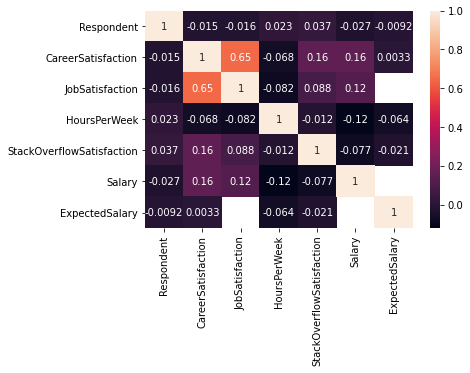

In [8]:
# Correlation heat map. I'll improve and expand on this later in the Notebook
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [9]:
# Some more EDA
df_schema.shape

(154, 2)

In [10]:
# Rows X Columns = Size
df.size

7914368

In [11]:
# Not a very helpful initial start to get a closer look at the columns
# This is a bit redundant since I know that I'll need to have a better formatted view of the column names
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [12]:
# However, salary is one dimension of my business understanding questioning, and satisfaction another dimension, so good to see the numerical viewpoints offered here.
# I'll be revisiting both of those areas as I focus down on country/region 
df.describe()

Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
count  51392.000000        42695.000000     40376.000000  20600.000000   
mean   25696.500000            7.300574         6.957078      3.952282   
std    14835.736854            1.955444         2.167652      7.564722   
min        1.000000            0.000000         0.000000      0.000000   
25%    12848.750000            6.000000         6.000000      1.000000   
50%    25696.500000            8.000000         7.000000      1.000000   
75%    38544.250000            9.000000         8.000000      4.000000   
max    51392.000000           10.000000        10.000000     40.000000   

       StackOverflowSatisfaction         Salary  ExpectedSalary  
count               36592.000000   12891.000000     2566.000000  
mean                    8.429875   56298.480641    33142.220468  
std                     1.390635   39880.905277    30162.988829  
min                     0.000000       0.000000        0.000000  
25%                     8.000000   26440.371839     4490.492484  
50%                     9.000000   50000.000000    29364.263691  
75%                    10.000000   80000.000000    50403.225806  
max                    10.000000  197000.000000   187500.000000

In [13]:
# More info from info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [14]:
# List the data types 
# From: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [15]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
0           1                 NaN              NaN           0.0   
1           2                 NaN              NaN           NaN   
2           3                 8.0              9.0           NaN   
3           4                 6.0              3.0           5.0   
4           5                 6.0              8.0           NaN   

   StackOverflowSatisfaction    Salary  ExpectedSalary  
0                        9.0       NaN             NaN  
1                        8.0       NaN         37500.0  
2                        8.0  113750.0             NaN  
3                       10.0       NaN             NaN  
4                        NaN       NaN             NaN

/Users/tommy/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/tommy/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/tommy/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/tommy/opt/anaconda3/li

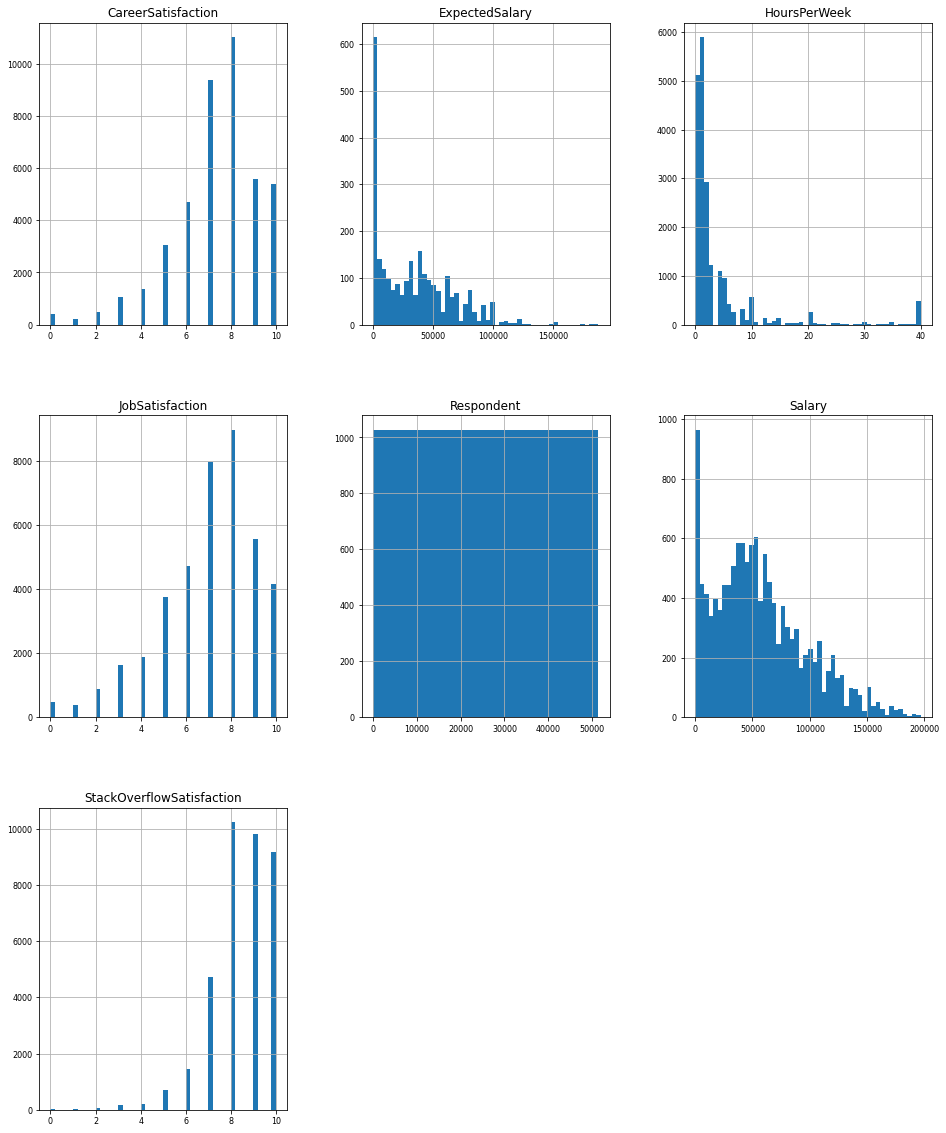

In [16]:
# I always find a lot of value in histograms, so wanted to get further exploration on my numerics
# Also give me a visual view of my NAN's as well. Another indication that Salary will need to be looked at closely.
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [17]:
# Null check
df.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [18]:
# I want to see the full set of Question Descriptors and the actual question, so need to set up for getting all the info. Kaggle doesn't have a full set of detail around the 2017
# survey, but this is helpful enough. As mentioned, I found that I needed to use the schema file for this detail from my initial interation through the main data file. CRISP-DM to me
# means that you might iterate back from Data Understanding back to Business Understanding as you more fully fill out your Business Understanding direction.

# There are 153 questions, so an easy number of lines to review

# Set options for full print
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',None)

In [19]:
# This is very helpful. Sometimes just the schema and/or data dictionary is all one has to start EDA with. This list gives a good overview of the survey questions.
df_schema

Column  \
0                          Respondent   
1                        Professional   
2                        ProgramHobby   
3                             Country   
4                          University   
5                    EmploymentStatus   
6                     FormalEducation   
7                      MajorUndergrad   
8                          HomeRemote   
9                         CompanySize   
10                        CompanyType   
11                       YearsProgram   
12                      YearsCodedJob   
13                  YearsCodedJobPast   
14                      DeveloperType   
15                   WebDeveloperType   
16                MobileDeveloperType   
17                   NonDeveloperType   
18                 CareerSatisfaction   
19                    JobSatisfaction   
20                      ExCoderReturn   
21                    ExCoderNotForMe   
22                     ExCoderBalance   
23                     ExCoder10Years   
24                    ExCoderBelonged   
25                      ExCoderSkills   
26                 ExCoderWillNotCode   
27                      ExCoderActive   
28                       PronounceGIF   
29                     ProblemSolving   
30                     BuildingThings   
31                    LearningNewTech   
32                      BoringDetails   
33                        JobSecurity   
34                 DiversityImportant   
35                         AnnoyingUI   
36                  FriendsDevelopers   
37                      RightWrongWay   
38                UnderstandComputers   
39                        SeriousWork   
40                    InvestTimeTools   
41                        WorkPayCare   
42                  KinshipDevelopers   
43                    ChallengeMyself   
44                       CompetePeers   
45                        ChangeWorld   
46                   JobSeekingStatus   
47                       HoursPerWeek   
48                         LastNewJob   
49                  AssessJobIndustry   
50                      AssessJobRole   
51                       AssessJobExp   
52                      AssessJobDept   
53                      AssessJobTech   
54                  AssessJobProjects   
55              AssessJobCompensation   
56                    AssessJobOffice   
57                   AssessJobCommute   
58                    AssessJobRemote   
59                   AssessJobLeaders   
60                 AssessJobProfDevel   
61                 AssessJobDiversity   
62                   AssessJobProduct   
63                  AssessJobFinances   
64                  ImportantBenefits   
65                         ClickyKeys   
66                         JobProfile   
67                     ResumePrompted   
68                      LearnedHiring   
69          ImportantHiringAlgorithms   
70             ImportantHiringTechExp   
71       ImportantHiringCommunication   
72          ImportantHiringOpenSource   
73               ImportantHiringPMExp   
74           ImportantHiringCompanies   
75              ImportantHiringTitles   
76           ImportantHiringEducation   
77                 ImportantHiringRep   
78   ImportantHiringGettingThingsDone   
79                           Currency   
80                           Overpaid   
81                         TabsSpaces   
82                 EducationImportant   
83                     EducationTypes   
84                    SelfTaughtTypes   
85                  TimeAfterBootcamp   
86                    CousinEducation   
87                          WorkStart   
88                 HaveWorkedLanguage   
89                   WantWorkLanguage   
90                HaveWorkedFramework   
91                  WantWorkFramework   
92                 HaveWorkedDatabase   
93                   WantWorkDatabase   
94                 HaveWorkedPlatform   
95                   WantWorkPlatform   
96                                IDE   
97           

In [20]:
# Reset defaults
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")


In [21]:
# #While I certainly understand the intent of this exercise to use a more native/low level and/or less packaged approach to EDA, I do find that pandas_profiing is always 
# #helpful
# #It does take a while to run :-)

# #I've left it in since it would be part of my normal day to day use of python while doing EDA

# #From: https://pypi.org/project/pandas-profiling/
# #and https://towardsdatascience.com/speed-up-your-exploratory-data-analysis-with-pandas-profiling-88b33dc53625

# import pandas_profiling
# from pandas_profiling import ProfileReport

In [22]:
#pandas_profiling.ProfileReport(df)

#### Pandas Profiling Insight
One thing I can see easily is that having so many categorical variable means I'll be needed to convert them to quantifiable values for further analysis. It's maybe more of an obvious, bot since I'm concentrating on 3 business questions, I'll want to work with a subset of the categorical variables. I want to get some high level views of the data next to sift through those variables to choose

In [23]:
# Data Understanding

# Reference: Refresher on bar chart types and use: https://benalexkeen.com/bar-charts-in-matplotlib/

# Note: The Y axis provides a relative scale, since my column totals could vary pretty widely. Likely a more elegant way to do the Y axis, but I just wanted a comparison of the totals
# from the column provided to this function

def display_bar_chart(df, column, title):

#     Bar Chart
    
#     As mentioned, I both like bar charts and especially to answer the questions from the Business Understanding section they will be very helpful in creating a fuller picture. This
#     function gives some good thumbnails on the features of the survey I'm interested in initially. Also starts to frame out what further wrangling might be needed.
    
#     Parameters:
#     df: a dataframe
#     column: Column of interest
#     title: Chart title
    
#     Returns:
#     None

    status_vals = df[column].value_counts()
    #print("Type",type(status_vals))
    #print("First Calc",status_vals[:10])
    #print("Second Calc",df.shape[0])
    #print("Third Calc",status_vals/df.shape[0])
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.ylabel('Relative Comparison Scale')
    plt.xlabel(column)
    plt.title(title);

In [24]:
# I also want to start looking at the breakdowns by country. I'm OK with the large number of respondents in the US compared to the rest of the countries, but I do want to research 
# the country breakdown a bit more
df['Country'].value_counts(normalize=True)
df['Country'].value_counts()

United States       11455
India                5197
United Kingdom       4395
Germany              4143
Canada               2233
                    ...  
Saint Helena            1
Pitcairn Island         1
Falkland Islands        1
Guinea                  1
Gibraltar               1
Name: Country, Length: 201, dtype: int64

In [25]:
# I'll use this variable later, although another aspect of survey are the ambigous question and/or response choice. In this case. "It's Complicated" is indeed that, as it doesn't really 
# what that time frame is. As there was an implicit ranking in the choices, I'll use that as sorting out what that means/implies in terms of actual days per month.
df['HomeRemote'].value_counts()

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

In [26]:
# Since I'm limited on the defaul display, I set for full display


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',None)

In [27]:
# # Reset defaults
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")
# pd.reset_option("display.width")
# pd.reset_option("display.max_colwidth")

In [28]:
# Rough estimate of number of countries. I figure a SWAG of 190 or so
# Great GroupBy Reference: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

len(df.groupby('Country').agg(['count', 'nunique']).stack())

402

In [29]:
# Just wanted to get a look at all the countries to 
#df.groupby('Country').agg(['count', 'size', 'nunique']).stack()
df.groupby('Country').agg(['count', 'nunique']).stack()

Respondent  Professional  \
Country                                                            
Afghanistan                    count            60            60   
                               nunique          60             5   
Aland Islands                  count            22            22   
                               nunique          22             5   
Albania                        count            76            76   
                               nunique          76             5   
Algeria                        count            41            41   
                               nunique          41             5   
American Samoa                 count             5             5   
                               nunique           5             2   
Andorra                        count             6             6   
                               nunique           6             2   
Angola                         count             9             9   
                               nunique           9             4   
Anguilla                       count             2             2   
                               nunique           2             1   
Antarctica                     count            11            11   
                               nunique          11             3   
Antigua and Barbuda            count             3             3   
                               nunique           3             3   
Argentina                      count           255           255   
                               nunique         255             5   
Armenia                        count            51            51   
                               nunique          51             5   
Aruba                          count             2             2   
                               nunique           2             2   
Australia                      count           913           913   
                               nunique         913             5   
Austria                        count           477           477   
                               nunique         477             5   
Azerbaidjan                    count            27            27   
                               nunique          27             4   
Bahamas                        count             1             1   
                               nunique           1             1   
Bahrain                        count            12            12   
                               nunique          12             2   
Bangladesh                     count           184           184   
                               nunique         184             5   
Barbados                       count             3             3   
                               nunique           3             2   
Belarus                        count            91            91   
                               nunique          91             4   
Belgium                        count           404           404   
                               nunique         404             5   
Belize                         count             4             4   
                               nunique           4             4   
Benin                          count             2             2   
                               nunique           2             2   
Bermuda                        count             2             2   
                               nunique           2             2   
Bhutan                         count             2             2   
                               nunique           2             2   
Bolivia                        count            23            23   
                               nunique          23             4   
Bosnia-Herzegovina             count            66            66   
                               nunique          66             5   
Botswana                       count             7             7   
                            

In [30]:
# Reset defaults
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

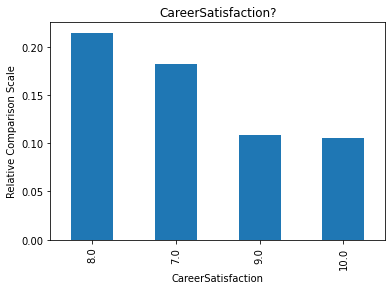

In [31]:
#CareerSatisfaction
# I may need to create a dictionary here, like "Really Satisfied, Kind Of, etc"
#  
display_bar_chart(df, "CareerSatisfaction", "CareerSatisfaction?")

In [32]:
# I'll use this variable later, although another aspect of survey are the ambigous question and/or response choice. In this case. "It's Complicated" is indeed that, as it doesn't really 
# what that time frame is. As there was an implicit ranking in the choices, I'll use that as sorting out what that means/implies in terms of actual days per month.
df['HomeRemote'].value_counts()

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

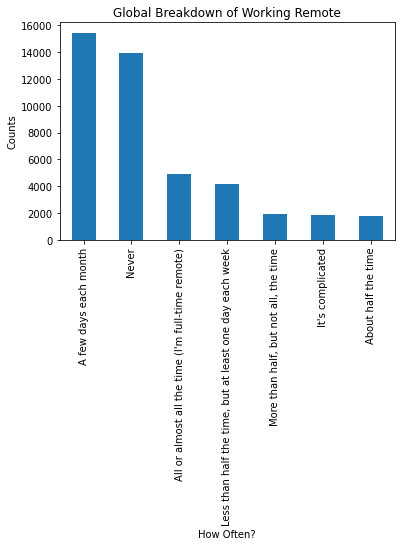

In [33]:
# I wanted to show the counts vs. relative scale since I'm going to use this graph for the blog

plt.title('Global Breakdown of Working Remote')
plt.xlabel('How Often?')
plt.ylabel('Counts')
df['HomeRemote'].value_counts().plot.bar();

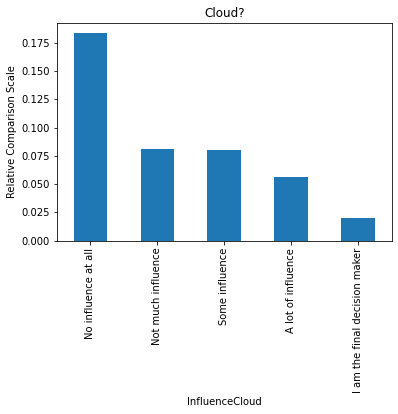

In [34]:
# I was really more interested in actually looking at jobs that work with a Cloud platform, but this is a question around "Do you have influnce on Cloud Platform choice".
# Still of interest, but less overall for me

display_bar_chart(df, "InfluenceCloud", "Cloud?")

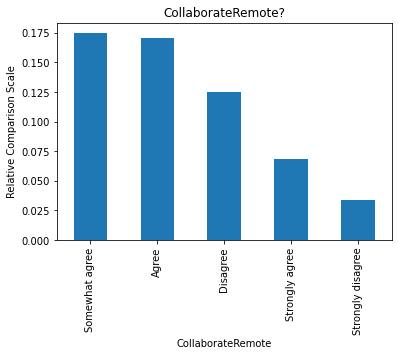

In [35]:
# Another Key one
display_bar_chart(df, "CollaborateRemote", "CollaborateRemote?")

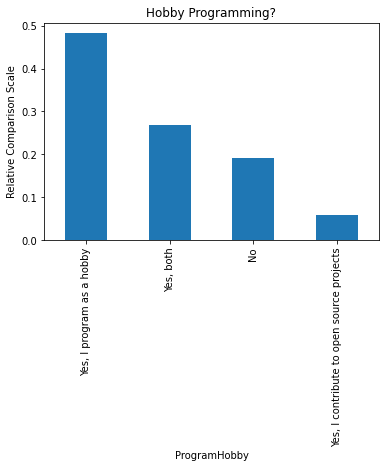

In [36]:
# I thought that individual that also programmed as a hobby would be more passionate about their day to day job and/or at least kept their programming skills sharp.
# Or possibly just total nerds! :-)

display_bar_chart(df, "ProgramHobby", "Hobby Programming?")

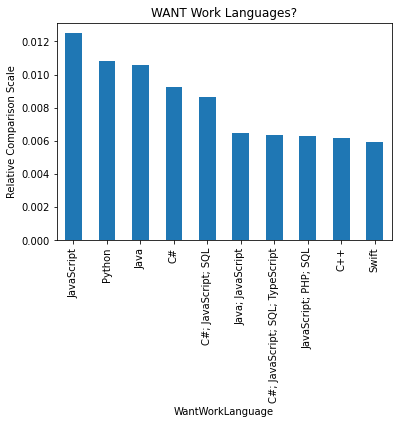

In [37]:
# Another key area 
display_bar_chart(df, "WantWorkLanguage", "WANT Work Languages?")

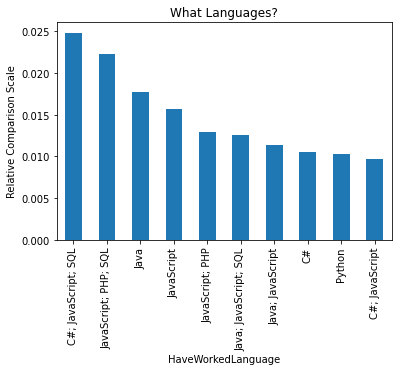

In [38]:
# Not sure if this would indicate a preference from someone who liked "newer" languaged and/or industry trends
display_bar_chart(df, "HaveWorkedLanguage", "What Languages?")

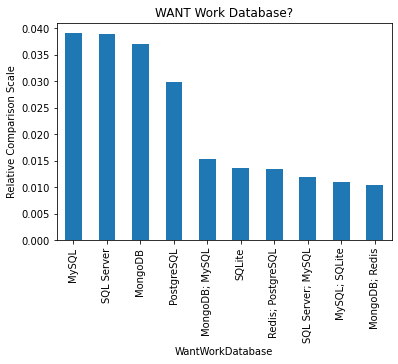

In [39]:
#I also enjoy databases
display_bar_chart(df, "WantWorkDatabase", "WANT Work Database?")

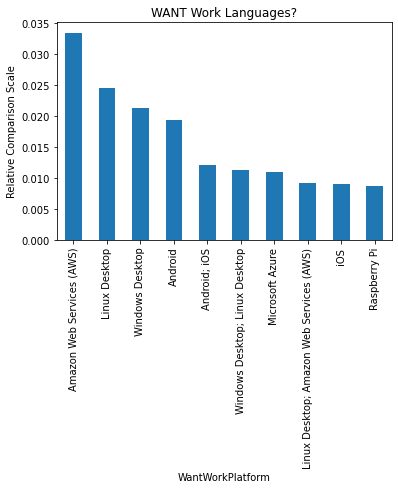

In [40]:
# And platforms too
display_bar_chart(df, "WantWorkPlatform", "WANT Work Languages?")

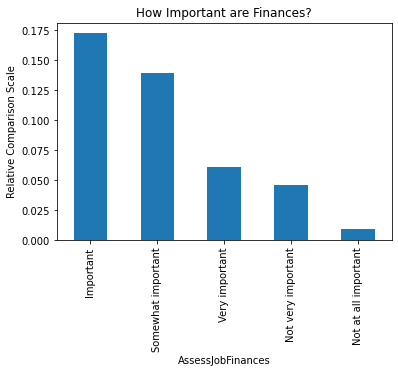

In [41]:
# Key area
display_bar_chart(df, "AssessJobFinances", "How Important are Finances?")

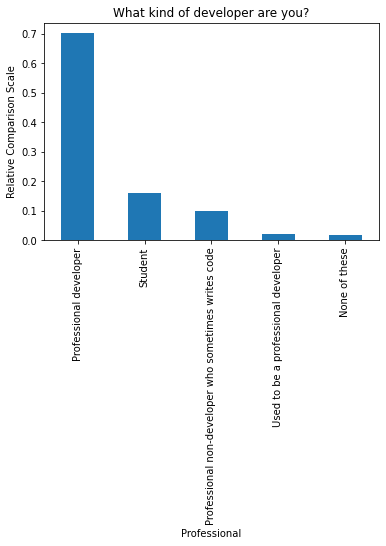

In [42]:
#Provide a pandas series of the counts for each Professional status
display_bar_chart(df, "Professional", "What kind of developer are you?")

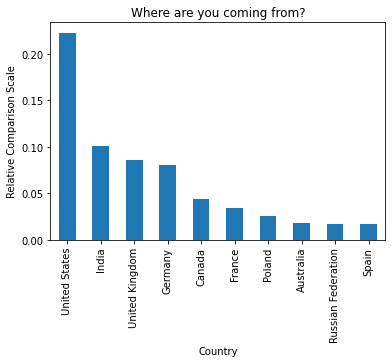

In [43]:

# This is a pretty important insight, since heavily skewed to results from the US. But I'm OK with the results. India is considered Emerging Markets so good to consider as well
display_bar_chart(df, "Country", "Where are you coming from?")

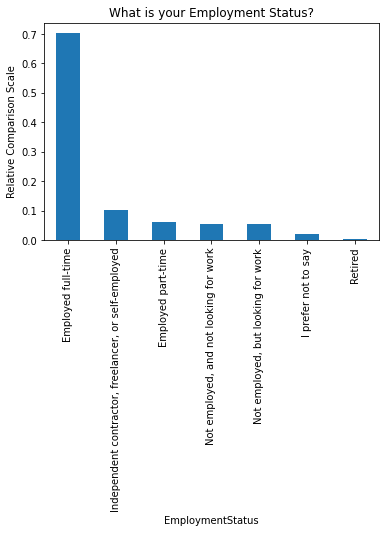

In [44]:
#Provide a pandas series of the counts for each Employment status
display_bar_chart(df, "EmploymentStatus", "What is your Employment Status?")

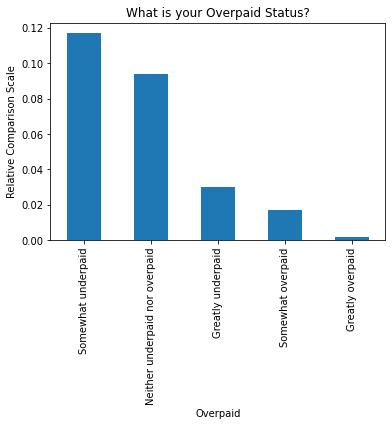

In [45]:
#Provide a pandas series of the counts for each Overpaid status
display_bar_chart(df, "Overpaid", "What is your Overpaid Status?")

## Data Understanding Summary
I had a lot of bar charts, since they were both of interest to me in general. But also to serve the main goal of producing a blog post. In researching "interesting" things to put in a blog post, I would want to produce a lot of visuals to be able to draw from.

# Data preparation

#### CRISP-DM Stage 3: Prepare Data
For categorical variables "Country", we seperate them into three sectors: western, eastern and other.
The following code define the lists of related countries and create a new column to identify whether that person lives in the west or in the east.

In [46]:
def country_split(df):

    
#     Return: A data frame segregated by what I'm defining as West vs. East
    
#     Parameters:
#     df: a dataframe
    
#     Returns:
#     df: a dataframe with a new column west or east
    

#     For the variable "Country", I bucket them into either West, East, or other. This is a helpful function as I may want to change how I define these categories 
#     As mentioned, my employer looks to fill positions in "Emerging Markets", which are primarily how I define "Eastern".
    
    western = ['United States',  'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

    eastern = ['Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan',  'India', 
           'Indonesia', 'Vietnam']
    
    #Add a new catagory seperating to western and eastern
    df['west_or_east'] = df['Country'].apply(lambda x: 'western' if x in western else ('eastern' if x in eastern else 'other'))
    
    return df

Here we select some useful columns for our analysis.
- Country: Country they are living
- YearsCodedJob: Years they are coding
- EmploymentStatus: Their employment status
- Salary: Their Salary
- JobSatisfaction & CareerSatisfaction: Are their satisfy their job and career
- Overpaid: How they think about their salary

I'm going to focus on employed full-time professional developer, since that's the job I'd be looking for (as well as blogging about)

In [47]:
def data_preparation(df):

    
    #    Return useful columns based on a query 
    
    #    Parameters:
    #   df: a  data dataframe
    
    #    Returns:
    #   useful_df: a filtered dataframe with the columns of interest
    
    #Get some useful columns for analysis
    useful_columns = ['Country', 'YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'west_or_east', 'Overpaid', 'CollaborateRemote', 'HomeRemote']
    useful_df = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female') and EmploymentStatus == 'Employed full-time'"))[useful_columns]
    return useful_df

In [48]:
# Produce a data frame to work with segmented by "east", "west", and "other"
df = country_split(df)

In [49]:
df.head()

Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Employed full-time   
4                      Employed full-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   
2                                  Bachelor's degree   
3                                    Doctoral degree   
4                                    Master's degree   

                                  MajorUndergrad  \
0                                            NaN   
1       Computer science or software engineering   
2       Computer science or software engineering   
3  A non-computer-focused engineering discipline   
4       Computer science or software engineering   

                                          HomeRemote  \
0                                                NaN   
1              More than half, but not all, the time   
2  Less than half the time, but at least one day ...   
3  Less than half the time, but at least one day ...   
4                                              Never   

                CompanySize  ... Gender HighestEducationParents  \
0                       NaN  ...   Male             High school   
1        20 to 99 employees  ...   Male       A master's degree   
2  10,000 or more employees  ...   Male   A professional degree   
3  10,000 or more employees  ...   Male       A doctoral degree   
4        10 to 19 employees  ...    NaN                     NaN   

                           Race         SurveyLong QuestionsInteresting  \
0  White or of European descent  Strongly disagree       Strongly agree   
1  White or of European descent     Somewhat agree       Somewhat agree   
2  White or of European descent     Somewhat agree                Agree   
3  White or of European descent              Agree                Agree   
4                           NaN                NaN                  NaN   

  QuestionsConfusing InterestedAnswers    Salary  ExpectedSalary  west_or_east  
0           Disagree    Strongly agree       NaN             NaN       western  
1           Disagree    Strongly agree       NaN         37500.0       western  
2           Disagree             Agree  113750.0             NaN       western  
3     Somewhat agree    Strongly agree       NaN             NaN       western  
4                NaN               NaN       NaN             NaN       western  

[5 rows x 155 columns]

In [50]:
# Get the Work Remote set of values
df.HomeRemote.unique()

array([nan, 'More than half, but not all, the time',
       'Less than half the time, but at least one day each week', 'Never',
       "All or almost all the time (I'm full-time remote)",
       "It's complicated", 'A few days each month', 'About half the time'],
      dtype=object)

In [51]:
# Null check. Some nulls, but I'll not worry about them as I'll just skip them for the mean calc
df.HomeRemote.isnull().sum()

7384

In [52]:
def homeremote_split(df):
    
    
    #Convert Home Remote from phrase to integer for calculating the mean
    
    #Parameters:
    #df: a dataframe that will be converted
    
    #Returns:
    #dataframe: a converted dataframe with Overpaid column becomes measurable
    
    
    homeremote_map = {
        'Never' : 1,
        'Less than half the time, but at least one day each week' : 2,
        'A few days each month' : 3,
        'About half the time' : 4,
        'More than half, but not all, the time' : 5,
        'It\'s complicated' : 6,
        'All or almost all the time (I\'m full-time remote)' : 7,
        np.nan: np.nan
    }
    df['HomeRemote'] = df['HomeRemote'].apply(lambda x: np.nan if x == np.nan else homeremote_map[x] )
    
    return df

In [53]:
#Get some useful columns for analysis
df = country_split(df)
useful_df = data_preparation(df)
useful_df.head()

Country     YearsCodedJob    EmploymentStatus  CareerSatisfaction  \
2   United Kingdom  20 or more years  Employed full-time                 8.0   
7           Poland      7 to 8 years  Employed full-time                 7.0   
8         Colombia      7 to 8 years  Employed full-time                 6.0   
13         Germany    15 to 16 years  Employed full-time                 8.0   
14  United Kingdom  20 or more years  Employed full-time                 8.0   

    JobSatisfaction                                   JobSeekingStatus  \
2               9.0                                                NaN   
7               7.0  I'm not actively looking, but I am open to new...   
8               6.0       I am not interested in new job opportunities   
13              6.0                    I am actively looking for a job   
14              8.0                                                NaN   

    HoursPerWeek    Salary west_or_east                        Overpaid  \
2            NaN  113750.0      western  Neither underpaid nor overpaid   
7            1.0       NaN      western                             NaN   
8            2.0       NaN        other  Neither underpaid nor overpaid   
13           3.0       NaN      western                             NaN   
14           NaN  100000.0      western              Somewhat underpaid   

    CollaborateRemote                                         HomeRemote  
2      Somewhat agree  Less than half the time, but at least one day ...  
7            Disagree  All or almost all the time (I'm full-time remote)  
8   Strongly disagree  Less than half the time, but at least one day ...  
13     Somewhat agree  Less than half the time, but at least one day ...  
14     Somewhat agree  All or almost all the time (I'm full-time remote)

For categorical variable Overpaid, we transfer it to calculatable integer value because we want to find out the mean of their opinion.
The following code shows the mapping.

In [54]:
def overpaid_split(df):
    
    
    #Convert Overpaid from words to integer for calculating the mean
    
    #Parameters:
    #df: a dataframe that will be converted
    
    #Returns:
    #dataframe: a converted dataframe with Overpaid column becomes measurable
    
    
    overpaid_map = {
        'Greatly underpaid' : 1,
        'Somewhat underpaid' : 2,
        'Neither underpaid nor overpaid' : 3,
        'Somewhat overpaid' : 4,
        'Greatly overpaid' : 5,
        np.nan: np.nan
    }
    df['Overpaid'] = df['Overpaid'].apply(lambda x: np.nan if x == np.nan else overpaid_map[x] )
    
    return df

Here we group the dataframe by west_or_east and YearsCodedJob, and get their mean, it automatically ignore the missing or null value.

In [55]:
# Get the collection of answers 
# While this is more of a subjective question to the survey respondent, I find in my experience the being able to collaborate remotely is a big plus. If the respondents
# in a country do not feel it important, then that to me is a bit telling about the culture/environment in their country. 
# Again, this is subjective. People could feel like it's really super important, but the employer does not allow it. 
df['CollaborateRemote'].unique()

array([nan, 'Strongly disagree', 'Somewhat agree', 'Agree', 'Disagree',
       'Strongly agree'], dtype=object)

In [56]:
#df['Overpaid'].unique()

In [57]:
def collaborate_split(df):
    
    
    #Map category of collaborate from word string to integer to get the mean calculation
    
    #Parameters:
    #df: a dataframe that will be converted
    
    #Returns:
    #dataframe: a converted dataframe with collaborate column becomes measurable
    
    
    collaborate_map = {
        'Strongly disagree' : 1,
        'Somewhat agree' : 2,
        'Agree' : 3,
        'Disagree' : 4,
        'Strongly agree' : 5,
        np.nan: np.nan
    }
    df['CollaborateRemote'] = df['CollaborateRemote'].apply(lambda x: np.nan if x == np.nan else collaborate_map[x] )
    
    return df

In [58]:
#Compare selected indicators between western and eastern
useful_df = collaborate_split(useful_df)
comparison = useful_df.groupby(['west_or_east','YearsCodedJob']).mean()
comparison

CareerSatisfaction  JobSatisfaction  \
west_or_east YearsCodedJob                                           
eastern      1 to 2 years                6.608597         5.884615   
             10 to 11 years              7.461538         6.589744   
             11 to 12 years              7.312500         6.718750   
             12 to 13 years              7.090909         6.121212   
             13 to 14 years              7.333333         7.666667   
...                                           ...              ...   
western      6 to 7 years                7.644114         7.177267   
             7 to 8 years                7.533846         7.183359   
             8 to 9 years                7.555752         7.069027   
             9 to 10 years               7.476000         6.988000   
             Less than a year            7.808112         7.644757   

                               HoursPerWeek        Salary  CollaborateRemote  
west_or_east YearsCodedJob                                                    
eastern      1 to 2 years          5.711462   7729.600579           2.916376  
             10 to 11 years        3.833333  34388.721465           3.038462  
             11 to 12 years        3.928571  36327.953116           3.142857  
             12 to 13 years        5.200000  53430.910772           3.000000  
             13 to 14 years       26.000000  50170.185287           2.250000  
...                                     ...           ...                ...  
western      6 to 7 years          2.211039  69648.807261           3.145719  
             7 to 8 years          2.154135  70307.843835           3.102459  
             8 to 9 years          2.096491  76314.628263           3.117936  
             9 to 10 years         2.148026  74142.281505           3.186004  
             Less than a year      1.818627  47711.456317           3.122881  

[63 rows x 5 columns]

In [59]:
#Compare selected indicators between western and eastern
useful_df = overpaid_split(useful_df)
comparison = useful_df.groupby(['west_or_east','YearsCodedJob']).mean()
comparison

CareerSatisfaction  JobSatisfaction  \
west_or_east YearsCodedJob                                           
eastern      1 to 2 years                6.608597         5.884615   
             10 to 11 years              7.461538         6.589744   
             11 to 12 years              7.312500         6.718750   
             12 to 13 years              7.090909         6.121212   
             13 to 14 years              7.333333         7.666667   
...                                           ...              ...   
western      6 to 7 years                7.644114         7.177267   
             7 to 8 years                7.533846         7.183359   
             8 to 9 years                7.555752         7.069027   
             9 to 10 years               7.476000         6.988000   
             Less than a year            7.808112         7.644757   

                               HoursPerWeek        Salary  Overpaid  \
west_or_east YearsCodedJob                                            
eastern      1 to 2 years          5.711462   7729.600579  2.077778   
             10 to 11 years        3.833333  34388.721465  2.500000   
             11 to 12 years        3.928571  36327.953116  2.333333   
             12 to 13 years        5.200000  53430.910772  2.428571   
             13 to 14 years       26.000000  50170.185287  2.500000   
...                                     ...           ...       ...   
western      6 to 7 years          2.211039  69648.807261  2.446512   
             7 to 8 years          2.154135  70307.843835  2.430052   
             8 to 9 years          2.096491  76314.628263  2.432927   
             9 to 10 years         2.148026  74142.281505  2.430524   
             Less than a year      1.818627  47711.456317  2.514986   

                               CollaborateRemote  
west_or_east YearsCodedJob                        
eastern      1 to 2 years               2.916376  
             10 to 11 years             3.038462  
             11 to 12 years             3.142857  
             12 to 13 years             3.000000  
             13 to 14 years             2.250000  
...                                          ...  
western      6 to 7 years               3.145719  
             7 to 8 years               3.102459  
             8 to 9 years               3.117936  
             9 to 10 years              3.186004  
             Less than a year           3.122881  

[63 rows x 6 columns]

In [60]:
#Compare selected indicators between western and eastern
useful_df = homeremote_split(useful_df)
comparison = useful_df.groupby(['west_or_east','YearsCodedJob']).mean()
comparison

CareerSatisfaction  JobSatisfaction  \
west_or_east YearsCodedJob                                           
eastern      1 to 2 years                6.608597         5.884615   
             10 to 11 years              7.461538         6.589744   
             11 to 12 years              7.312500         6.718750   
             12 to 13 years              7.090909         6.121212   
             13 to 14 years              7.333333         7.666667   
...                                           ...              ...   
western      6 to 7 years                7.644114         7.177267   
             7 to 8 years                7.533846         7.183359   
             8 to 9 years                7.555752         7.069027   
             9 to 10 years               7.476000         6.988000   
             Less than a year            7.808112         7.644757   

                               HoursPerWeek        Salary  Overpaid  \
west_or_east YearsCodedJob                                            
eastern      1 to 2 years          5.711462   7729.600579  2.077778   
             10 to 11 years        3.833333  34388.721465  2.500000   
             11 to 12 years        3.928571  36327.953116  2.333333   
             12 to 13 years        5.200000  53430.910772  2.428571   
             13 to 14 years       26.000000  50170.185287  2.500000   
...                                     ...           ...       ...   
western      6 to 7 years          2.211039  69648.807261  2.446512   
             7 to 8 years          2.154135  70307.843835  2.430052   
             8 to 9 years          2.096491  76314.628263  2.432927   
             9 to 10 years         2.148026  74142.281505  2.430524   
             Less than a year      1.818627  47711.456317  2.514986   

                               CollaborateRemote  HomeRemote  
west_or_east YearsCodedJob                                    
eastern      1 to 2 years               2.916376    2.497738  
             10 to 11 years             3.038462    2.897436  
             11 to 12 years             3.142857    2.937500  
             12 to 13 years             3.000000    2.757576  
             13 to 14 years             2.250000    2.888889  
...                                          ...         ...  
western      6 to 7 years               3.145719    2.663514  
             7 to 8 years               3.102459    2.818321  
             8 to 9 years               3.117936    2.724868  
             9 to 10 years              3.186004    2.827128  
             Less than a year           3.122881    2.181960  

[63 rows x 7 columns]

In [61]:
comparison.Salary

west_or_east  YearsCodedJob   
eastern       1 to 2 years         7729.600579
              10 to 11 years      34388.721465
              11 to 12 years      36327.953116
              12 to 13 years      53430.910772
              13 to 14 years      50170.185287
                                      ...     
western       6 to 7 years        69648.807261
              7 to 8 years        70307.843835
              8 to 9 years        76314.628263
              9 to 10 years       74142.281505
              Less than a year    47711.456317
Name: Salary, Length: 63, dtype: float64

In [62]:
#comparison.describe

For categorical variable YearsCodedJob, we transfer it to calculatable integer value because we want to find out the mean of how long they have been coded.
The following code shows the mapping.

In [63]:
def years_coded_split(df):
    
    
    #Convert the working year to integer for calculating the mean
    
    #Parameters:
    #df: a dataframe that will be converted
    
    #Returns:
    #dataframe: a converted dataframe with YearsCodedJob column becomes measurable
    
    
    year_map = {'1 to 2 years' : 1, 
                '10 to 11 years' : 10, 
                '11 to 12 years' : 11, 
                '12 to 13 years' : 12,
                '13 to 14 years' : 13, 
                '14 to 15 years' : 14, 
                '15 to 16 years' : 15, 
                '16 to 17 years' : 16,
                '17 to 18 years' : 17, 
                '18 to 19 years' : 18, 
                '19 to 20 years' : 19, 
                '2 to 3 years' : 2,
                '20 or more years' : 20, 
                '3 to 4 years' : 3, 
                '4 to 5 years' : 4, 
                '5 to 6 years' : 5, 
                '6 to 7 years' : 6, 
                '7 to 8 years' : 7, 
                '8 to 9 years' : 8, 
                '9 to 10 years' : 9, 
                'Less than a year' : 0}
    
    df_graph = df.reset_index()
    df_graph['YearsCodedJob'] = df_graph['YearsCodedJob'].apply(lambda x: year_map[x])
    df_graph['YearsCodedJob'] = pd.to_numeric(df_graph['YearsCodedJob'])
    
    return df_graph

In [64]:
comparison_graph = years_coded_split(comparison)
comparison_graph = comparison_graph.sort_values(by='YearsCodedJob')

In [65]:
comparison_graph


west_or_east  YearsCodedJob  CareerSatisfaction  JobSatisfaction  \
62      western              0            7.808112         7.644757   
41        other              0            7.167382         6.931624   
20      eastern              0            6.603960         6.000000   
42      western              1            7.585460         7.152713   
21        other              1            7.550186         6.860075   
..          ...            ...                 ...              ...   
10      eastern             19            7.375000         7.500000   
31        other             19            7.484848         6.848485   
54      western             20            7.852551         7.334266   
12      eastern             20            7.923077         7.076923   
33        other             20            7.722826         7.289617   

    HoursPerWeek         Salary  Overpaid  CollaborateRemote  HomeRemote  
62      1.818627   47711.456317  2.514986           3.122881    2.181960  
41      3.271028   12258.385322  2.323077           2.970760    2.292373  
20      5.333333    8904.069460  2.424658           3.021898    2.331683  
42      2.216606   48332.625897  2.381868           3.170576    2.261372  
21      3.753378   15433.503928  2.306452           2.992500    2.537175  
..           ...            ...       ...                ...         ...  
10      0.500000   16150.345030  1.000000           2.800000    2.750000  
31      3.823529   47206.186787  2.533333           2.920000    2.848485  
54      2.285470  103337.295829  2.501416           3.112546    3.378322  
12      3.428571   53194.211737  2.600000           3.000000    3.000000  
33      3.270270   63286.119422  2.483146           2.919708    3.293478  

[63 rows x 9 columns]

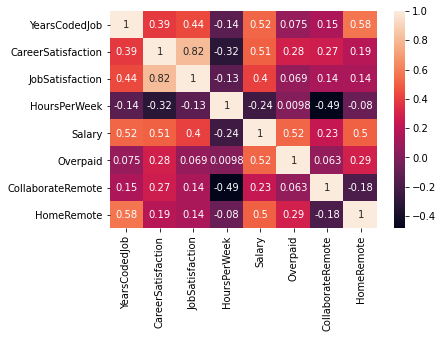

In [66]:
# I wanted to get a visual view of correlations, so started with a heatmap. This maps across all countries, no split across West/East/Other

# Helpful overview: https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
corrMatrix = comparison_graph.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [67]:
# Get a dataframe for looking at the split correlations
dfy = comparison_graph.groupby('west_or_east')

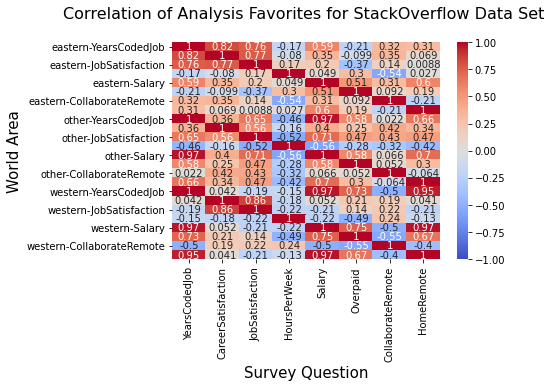

In [68]:
# This is useful, and here's a more visual look at the correlation matrix. Still a bit busy, so I'll tweeze out relationships in further charts.
corrMatrix = dfy.corr()
# sn.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
# I'm not such a fan of lines in the heatmap
ax = plt.axes()

sn.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax)

plt.title('Correlation of Analysis Favorites for StackOverflow Data Set \n', fontsize = 16) # title with fontsize 20
plt.xlabel('Survey Question', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('World Area', fontsize = 15) # y-axis label with fontsize 15

plt.show()

In [69]:
comparison_graph.set_index('YearsCodedJob', inplace=True)

### Review Findings

#### CRISP-DM Stage 4/5: Model Data and Results

Now to review our findings...

A helpful thought about survey data. A single years survey data is a snapshot of results, so "modeling" may mean different things to different individuals. I liked this article on Explanatory vs. Predictive modeling. So much of what I see in my workday is around Predicitive model..."show me the future" thinking. Nothing wrong with that, but basic statistical analysis, EDA, and something as simple as a bar graph can go a long way in getting a point across. See: https://www.surveypractice.org/article/2718-an-introduction-to-machine-learning-methods-for-survey-researchers

That said, modeling such as classification with survey data is a great technique. The folks at Survey Monkey have some ideas here: https://monkeylearn.com/blog/survey-analysis/#what-is-aspect-based-sentiment-analysis

Coming from SPSS, I've found that Sentiment Analysis is a very powerful and a common way to analyze data. There are a variety of automated/expert models in SPSS around sentiment and classification, and KDnuggets here provides a good overview as well: https://www.kdnuggets.com/2018/03/5-things-sentiment-analysis-classification.html


#### Salary

I was interested in the breakdown by age bracket, both to get a sense of age groups as well as if seniority was a factor. As expected, it was. I've kept in the "Other" category since I wanted to see how it look subtracting both the Western and Eastern countries. Remember, the concept of what is "East" vs. "West" vs. "Other" is defined by myself for this set of analysis.

Text(0, 0.5, 'Average Salary')

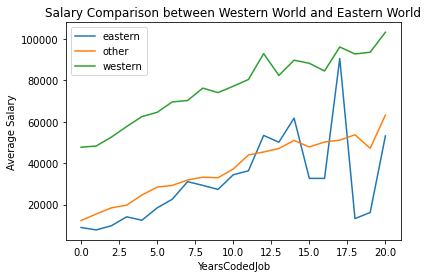

In [70]:
#Plot the Salary Comparison between Western World and Eastern World
comparison_graph.groupby('west_or_east')['Salary'].plot(legend=True)
plt.title("Salary Comparison between Western World and Eastern World");
plt.xlabel('YearsCodedJob')
plt.ylabel('Average Salary')

#### Are you overpaid or underpaid?

I thought this would also be a useful analysis. In general, those in the West see themselves as trending towards overpaid. I'm not sure what the significance of the big drop after 12.5 years to greatly underpaid, unless there is an age bias in the Eastern Countries. However, that theory is a little weak with the sudden rise to overpaid at 15 years or greater.

Overpaid/underpaid is still a pretty subjective category. What would have been helpful is to have a metric that held the industry averages for each country to compare against. For my purposes, this analysis tells me that the survey respondents in the east generally feel more underpaid than those in the west.

As a reminder, here is the map I used to map values to the Overpaid survey question:

    overpaid_map = {
        'Greatly underpaid' : 1,
        'Somewhat underpaid' : 2,
        'Neither underpaid nor overpaid' : 3,
        'Somewhat overpaid' : 4,
        'Greatly overpaid' : 5,
        np.nan: np.nan

Text(0, 0.5, 'Overpaid')

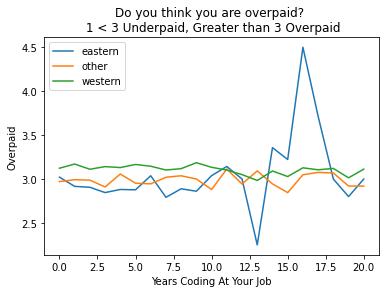

In [71]:
#Plot how the programmer thinks they are overpaid or not
comparison_graph.groupby('west_or_east')['CollaborateRemote'].plot(legend=True)
plt.title("Do you think you are overpaid? \n 1 < 3 Underpaid, Greater than 3 Overpaid");
plt.xlabel('Years Coding At Your Job')
plt.ylabel('Overpaid')

In [72]:
#dfxx = groupby('west_or_east').mean().CareerSatisfaction
#display_bar_chart(df, "CareerSatisfaction", "What is your Career Satisfaction?")

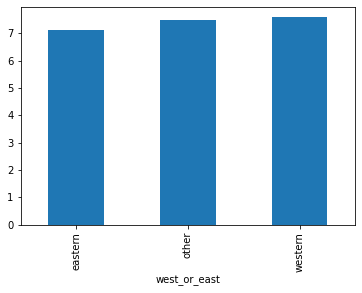

In [73]:
comparison_graph.groupby('west_or_east').mean().CareerSatisfaction.plot.bar();


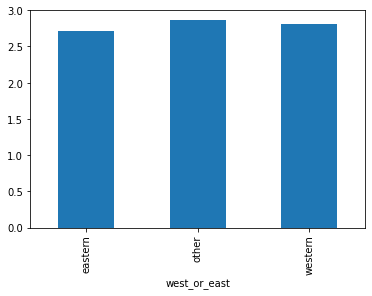

In [74]:
comparison_graph.groupby('west_or_east').mean().HomeRemote.plot.bar();


In [75]:
height = comparison_graph.groupby('west_or_east').mean().CareerSatisfaction
print(height)

west_or_east
eastern    7.127509
other      7.497854
western    7.576824
Name: CareerSatisfaction, dtype: float64


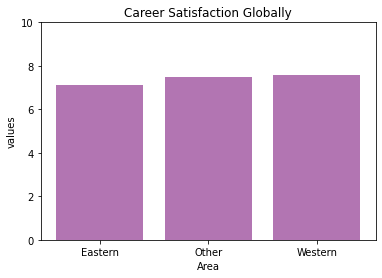

In [76]:
# Career Satisfaction
height = comparison_graph.groupby('west_or_east').mean().CareerSatisfaction
bars = ('Eastern', 'Other', 'Western')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Career Satisfaction Globally')
plt.xlabel('Area')
plt.ylabel('values')
 
# Limits for the Y axis
plt.ylim(0,10)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

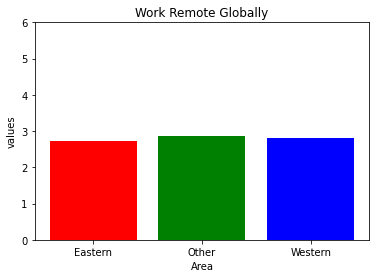

In [77]:
# Work Remote 
height = comparison_graph.groupby('west_or_east').mean().HomeRemote
bars = ('Eastern', 'Other', 'Western')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = ('red','green','blue'))
 
# Add title and axis names
plt.title('Work Remote Globally')
plt.xlabel('Area')
plt.ylabel('values')
 
# Limits for the Y axis
plt.ylim(0,6)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [78]:
comparison.groupby('west_or_east').mean().CareerSatisfaction


west_or_east
eastern    7.127509
other      7.497854
western    7.576824
Name: CareerSatisfaction, dtype: float64

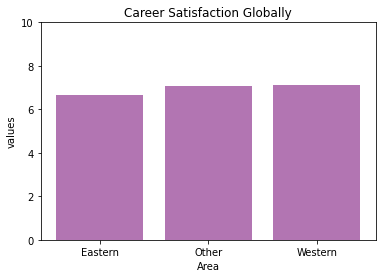

In [79]:
# Job Satisfaction
height = comparison_graph.groupby('west_or_east').mean().JobSatisfaction
bars = ('Eastern', 'Other', 'Western')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Career Satisfaction Globally')
plt.xlabel('Area')
plt.ylabel('values')
 
# Limits for the Y axis
plt.ylim(0,10)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [80]:
comparison.groupby('west_or_east').mean().JobSatisfaction

west_or_east
eastern    6.650067
other      7.053151
western    7.123190
Name: JobSatisfaction, dtype: float64

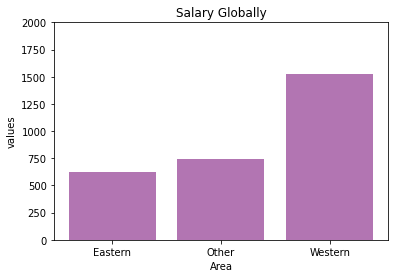

In [81]:
# Salary View
height = comparison.groupby('west_or_east').mean().Salary/50
bars = ('Eastern', 'Other', 'Western')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Salary Globally')
plt.xlabel('Area')
plt.ylabel('values')
 
# Limits for the Y axis
plt.ylim(0,2000)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [82]:
comparison.groupby('west_or_east').mean().Salary

west_or_east
eastern    31242.892039
other      37351.011294
western    76472.507561
Name: Salary, dtype: float64

In [83]:
import matplotlib

matplotlib.__version__

'3.2.1'

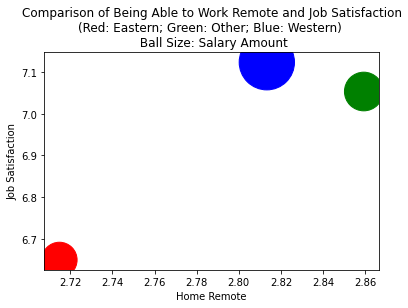

In [84]:
#Plot Comparison of Being Able to Work Remote and Job Satisfaction between Western and Eastern by Salary
plt.scatter(comparison.groupby('west_or_east').mean().HomeRemote, comparison.groupby('west_or_east').mean().JobSatisfaction, comparison.groupby('west_or_east').mean().Salary/25, c=['red','green','blue'])

plt.title('Comparison of Being Able to Work Remote and Job Satisfaction\n(Red: Eastern; Green: Other; Blue: Western) \n Ball Size: Salary Amount');
plt.xlabel('Home Remote');
plt.ylabel('Job Satisfaction');

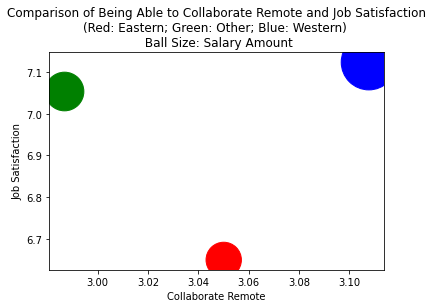

In [85]:
#Plot Comparison of Being Able to Collaborate Remote and Job Satisfaction between Western and Eastern by Salary
plt.scatter(comparison.groupby('west_or_east').mean().CollaborateRemote, comparison.groupby('west_or_east').mean().JobSatisfaction, comparison.groupby('west_or_east').mean().Salary/25, c=['red','green','blue'])

plt.title('Comparison of Being Able to Collaborate Remote and Job Satisfaction\n(Red: Eastern; Green: Other; Blue: Western) \n Ball Size: Salary Amount');
plt.xlabel('Collaborate Remote');
plt.ylabel('Job Satisfaction');

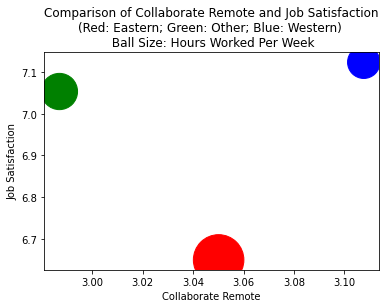

In [86]:
#Plot Comparison of Collaborate Remote and Job Satisfaction between Western and Eastern by Hours Worked Per Week
plt.scatter(comparison.groupby('west_or_east').mean().CollaborateRemote, comparison.groupby('west_or_east').mean().JobSatisfaction, comparison.groupby('west_or_east').mean().HoursPerWeek*500, c=['red','green','blue'])

plt.title('Comparison of Collaborate Remote and Job Satisfaction\n(Red: Eastern; Green: Other; Blue: Western) \n Ball Size: Hours Worked Per Week');
plt.xlabel('Collaborate Remote');
plt.ylabel('Job Satisfaction');

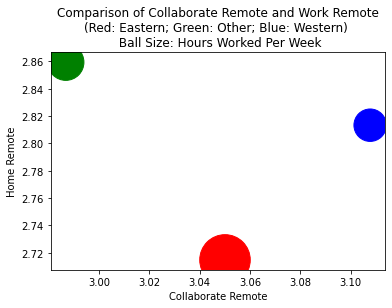

In [87]:
#Plot Comparison of Collaborate Remote and Work Remote between Western and Eastern by Hours Worked Per Week
plt.scatter(comparison.groupby('west_or_east').mean().CollaborateRemote, comparison.groupby('west_or_east').mean().HomeRemote, comparison.groupby('west_or_east').mean().HoursPerWeek*500, c=['red','green','blue'])

plt.title('Comparison of Collaborate Remote and Work Remote\n(Red: Eastern; Green: Other; Blue: Western) \n Ball Size: Hours Worked Per Week');
plt.xlabel('Collaborate Remote');
plt.ylabel('Home Remote');

Here, we can see that western programmers (blue ball) have a much higher satisfaction on their job and career, positioned at the right-high-up corner. The ball size indicator their average salary, the blue ball size is much larger than the red ball (eastern programmers salary).

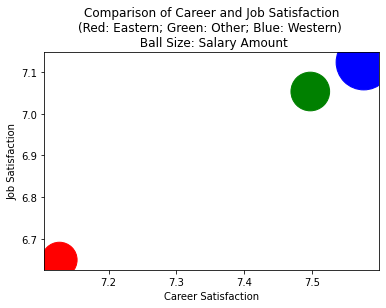

In [88]:
#Plot Comparison of Career and Job Satisfaction between Western and Eastern by Salary
plt.scatter(comparison.groupby('west_or_east').mean().CareerSatisfaction, comparison.groupby('west_or_east').mean().JobSatisfaction, comparison.groupby('west_or_east').mean().Salary/25, c=['red','green','blue'])

plt.title('Comparison of Career and Job Satisfaction\n(Red: Eastern; Green: Other; Blue: Western) \n Ball Size: Salary Amount');
plt.xlabel('Career Satisfaction');
plt.ylabel('Job Satisfaction');

### Conclusion

#### CRISP-DM Stage 5: Evaluation/Deployment

1. Across the range of age brackets, the salary levels reported for "Eastern" vs. "Western" countries (as defined by myself) were lower.
2. There was a big drop after 12.5 years to greatly underpaid, that could possibly indicate an age bias in the Eastern Countries. However, that theory is a little weak with the sudden rise to overpaid at 15 years or greater. There would be two ways to treat this:
    - Remove those low values
    - Investigate further; however this would require finding data beyond this survey data
3. As well, Job Satisfaction and Career Satisfaction are higher for those in the "Western" countries vs "Eastern". This would be an area that would be worth investigating further, looking for anecdotal data from sites such as Glassdoor, LinkedIn, etc. As well, interviewing in those countries should include questions that cover this topic as well.
4. It's worth looking at the types of Machine Learning and Statistical Models to be used with Survey and other subjective data and looking closely at how the categorical data is translated to quantitative measures for analysis. Further analysis via Sentiment would also be a good area to review.

For the deployment, I'll be modifying this notebook into a blog post. A nice detailed write up on setting up a Data Science Blog: https://www.dataquest.io/blog/how-to-setup-a-data-science-blog/
